In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=3)
%matplotlib inline



In [26]:
ipo_file_path = 'Test.csv'
ipo_data = pd.read_csv(ipo_file_path, index_col=0)

In [27]:
ipo_data.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Target
0,1,0,1,0.400876,-0.828236,0.054252,-0.563181,0.449091,0.235577,0.061438,...,0,0,0,0,0,1,0,0,0,0.708380
1,1,1,1,0.470136,-0.089750,0.025410,-0.081065,0.128571,0.033837,0.076672,...,0,0,0,0,0,0,0,1,0,0.290237
2,1,1,1,0.501639,-0.124612,0.033629,-0.117161,0.332229,0.100585,0.049234,...,0,0,0,0,0,0,0,1,0,0.990991
3,1,1,1,0.452561,-0.101908,0.033335,-0.095239,0.164426,0.083417,0.012057,...,0,0,0,0,0,1,0,0,0,0.954089
4,1,1,1,0.521170,-0.012306,0.004362,-0.012231,0.495039,0.330732,0.052344,...,0,0,0,1,0,0,0,0,0,0.031333


In [29]:
ipo_data.iloc[:,-1:].describe()

,Target
count,2046.000000
mean,1.099045
std,0.867110
min,0.014423
25%,0.611263
50%,0.948420
75%,1.357186
max,12.304839


In [24]:
print(f"stocks price triple for 1 year: {ipo_data[ipo_data['Target']>3]['Target'].count()/ipo_data.shape[0]:.1%}")
print(f"meadian positive Target: {ipo_data[ipo_data['Target']>3]['Target'].median():.3f}")
print(f"meadian negative Target: {ipo_data[ipo_data['Target']<3]['Target'].median():.3f}")

stocks price triple for 1 year: 2.4%
meadian positive Target: 3.683
meadian negative Target: 0.929


In [40]:
ipo_data['Target>3'] = (ipo_data['Target'] > 3).astype('int')
ipo_data.groupby(['Target>3'])['Target'].describe()

,count,mean,std,min,25%,50%,75%,max
Target>3,,,,,,,,
0,1996.0,1.009837,0.571945,0.014423,0.600873,0.928997,1.320363,2.985149
1,50.0,4.660219,2.189988,3.022388,3.325995,3.683213,4.871866,12.304839


In [5]:
X = ipo_data.drop('Target', axis=1)
y = (ipo_data['Target']>3).astype(int)
print(f'The dataset contains {y[y==1].count()}({y[y==1].count()/y.count():.1%}) positive samples and \
{y[y==0].count()} ({y[y==0].count()/y.count():.1%}) negative samples')

The dataset contains 50(2.4%) positive samples and 1996 (97.6%) negative samples


In [6]:
# sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


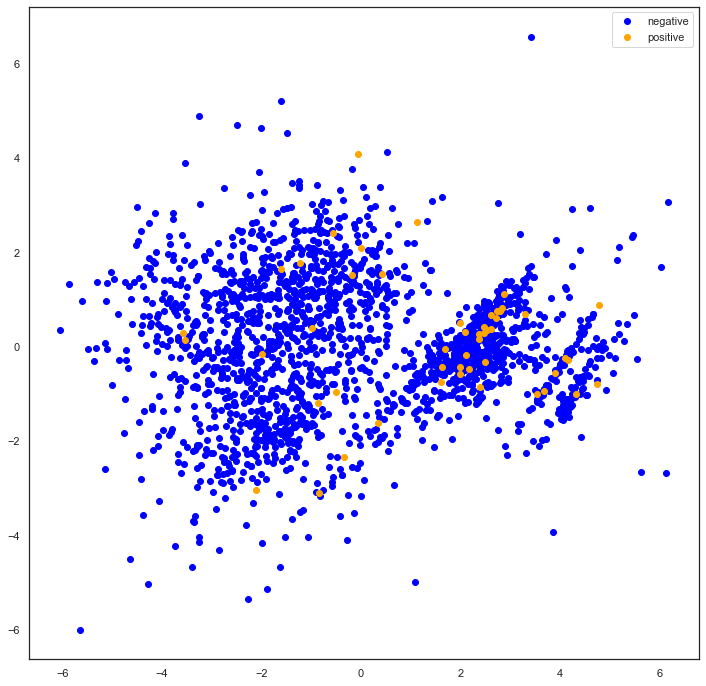

In [7]:
fig = plt.figure(1, figsize=(12, 12))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'o', color='blue', label='negative')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'o', color='orange', label='positive')
plt.legend(loc=0);


90% дисперсии содержится в 13 компонентиах

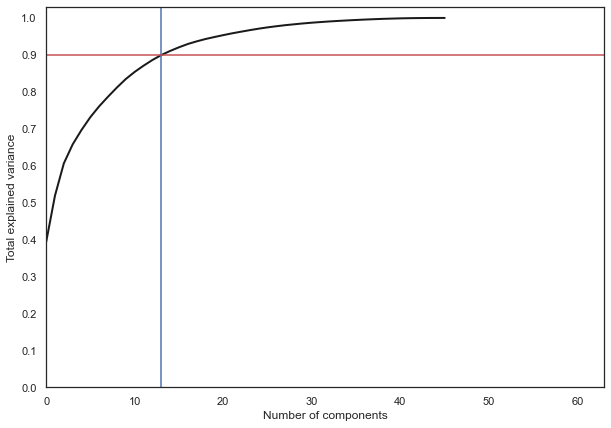

In [8]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(13, c='b')
plt.axhline(0.9, c='r')
plt.show();

Wall time: 12.6 s


Text(0.5, 1.0, 'IPO t-SNE projection')

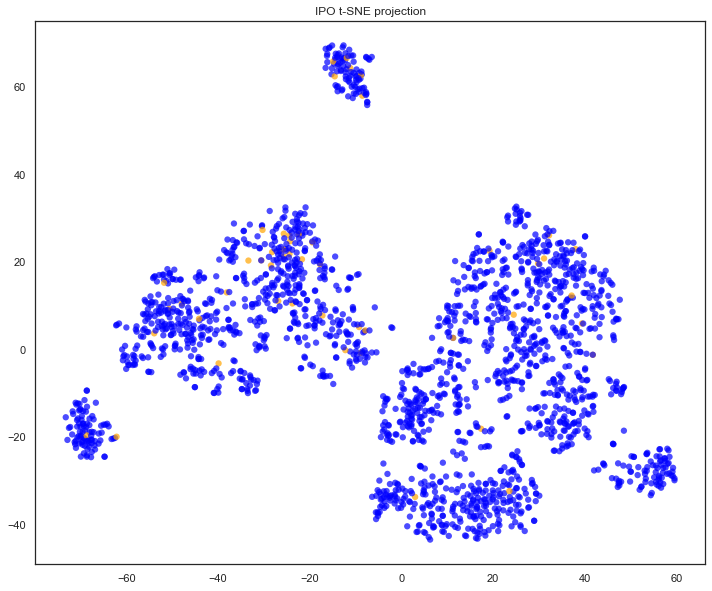

In [9]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.map({0: 'blue', 1: 'orange'}), 
            edgecolor='none', alpha=0.7, s=40)
plt.title('IPO t-SNE projection')

In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 13.1 s


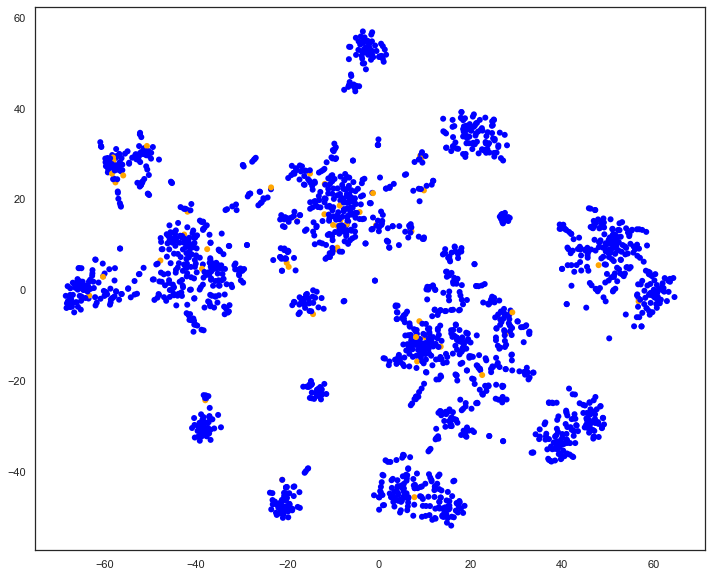

In [13]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], edgecolor='none',
            c=y.map({0: 'blue', 1: 'orange'}));

In [16]:
pd.DataFrame(tsne_representation).to_csv('tsne_representation.csv')